In [1]:
import sys   
!{sys.executable} -m pip install --user yacs

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [1]:
import cv2
from utils_inference import get_lmks_by_img, get_model_by_name, get_preds, decode_preds, crop
from utils_landmarks import show_landmarks, get_five_landmarks_from_net, alignment_orig

In [2]:
def detect_direction(lmks, img_w):
    #FL, HL, C, HR, FR 
    left_eye  = lmks[0][0]
    right_eye = lmks[1][0]
    nose   = lmks[2][0]

    center = img_w/2
    offset = img_w/10
    half_bound = img_w/ 8 * 5
    full_bound = img_w/ 8
    
    diff_eye = abs(left_eye - right_eye)
    print("nose : %d" % nose)
    print("half bound : %d" % half_bound)
    print("full bound : %d" % full_bound)

    print("center : %d" % center)
    print("offset : %d" % offset)
    if nose > center+offset:
        print("nose > centr+offset")
        if diff_eye < full_bound:
            return 4 #FR
        elif diff_eye < half_bound:
            return 3 #HR
    elif nose < center-offset:
        print("nose < centr-offset")

        if diff_eye < full_bound:
            return 0 #FL
        elif diff_eye < half_bound:
            return 1 #HL
        
    return 2 #C

In [4]:
#Full Left : DSC_3561
#Half Left : DSC_3560
#Center    : DSC_3558
#Half Right: DSC_3563
#Full Right: DSC_3564
img_paths = ["DSC_3561", 
            "DSC_3560",
            "DSC_3558",
            "DSC_3563",
            "DSC_3564"
           ]

imgs = []
for img_path in img_paths:
    img = cv2.imread('./images/SHW/%s.JPG' % (img_path))
    imgs.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

CIRCLE_SIZE = imgs[0].shape[0]//200

In [5]:
model = get_model_by_name('AFLW')
lmks_l = []
for img in imgs:
    lmks = get_lmks_by_img(model, img) 
    five_lmks = get_five_landmarks_from_net(lmks)

    lmks_l.append(five_lmks)

[[1807. 1852.]
 [2137. 1558.]
 [2431. 1668.]
 [2467. 1668.]
 [2467. 1668.]
 [2504. 1668.]
 [1953. 2476.]
 [2137. 2550.]
 [2247. 2550.]
 [2357. 2550.]
 [2394. 2550.]
 [2394. 2550.]
 [2541. 3908.]
 [2945. 3541.]
 [2945. 3761.]
 [2431. 4936.]
 [2761. 4863.]
 [2578. 4826.]
 [2210. 2513.]]


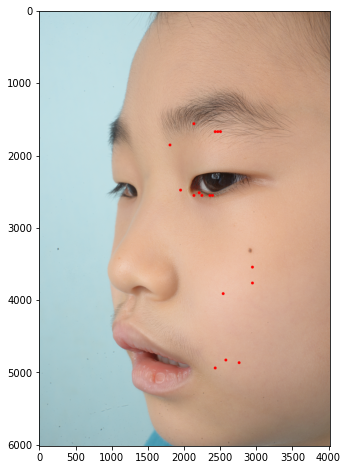

In [6]:
IDX = 1
print(lmks)
CIRCLE_SIZE = imgs[IDX].shape[1]//200
show_landmarks(imgs[IDX], lmks, circle_size=CIRCLE_SIZE)

In [7]:
#detect direction
print(lmks_l)
for i in range(len(lmks_l)):
    print(detect_direction(lmks_l[i], imgs[0].shape[1]))

[array([[1917., 2366.],
       [2210., 2366.],
       [1329., 3394.],
       [1733., 4679.],
       [1953., 4863.]], dtype=float32), array([[1219., 2476.],
       [2431., 2366.],
       [1072., 3578.],
       [1256., 4789.],
       [2100., 4936.]], dtype=float32), array([[ 925., 2733.],
       [3092., 2733.],
       [2064., 3871.],
       [1256., 5083.],
       [2761., 5083.]], dtype=float32), array([[1476., 2476.],
       [2761., 2660.],
       [2871., 3651.],
       [1843., 4973.],
       [2651., 4789.]], dtype=float32), array([[2137., 2550.],
       [2394., 2550.],
       [2945., 3541.],
       [2431., 4936.],
       [2578., 4826.]], dtype=float32)]
nose : 1329
half bound : 2510
full bound : 502
center : 2008
offset : 401
nose < centr-offset
0
nose : 1072
half bound : 2510
full bound : 502
center : 2008
offset : 401
nose < centr-offset
1
nose : 2064
half bound : 2510
full bound : 502
center : 2008
offset : 401
2
nose : 2871
half bound : 2510
full bound : 502
center : 2008
offset : 4

/data/HRNet-landmarks/matlab_cp2tform.py:314: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)


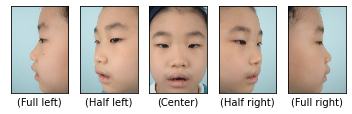

In [8]:
#center_five_lmks = get_five_landmarks_from_net(lmks_l[2])
#print(center_five_lmks)
center_lmks = lmks_l[2]
aligned_img = alignment_orig(imgs[0], center_lmks, ncols=112, nrows=112)

import matplotlib.pyplot as plt

fig = plt.figure() # rows*cols 행렬의 i번째 subplot 생성
rows = 1
cols = 5
i = 1
 
xlabels = ["label",  "(Full left)", "(Half left)", "(Center)", "(Half right)", "(Full right)"]
 
for img in imgs:
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img)
    ax.set_xlabel(xlabels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
plt.show()

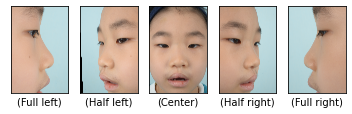

In [9]:
fig = plt.figure() # rows*cols 행렬의 i번째 subplot 생성
rows = 1
cols = 5
i = 1
 
xlabels = ["label",  "(Full left)", "(Half left)", "(Center)", "(Half right)", "(Full right)"]
height = imgs[0].shape[0]
width = imgs[0].shape[1]

for img_i in range(len(imgs)):
    ax = fig.add_subplot(rows, cols, i)
    print()
    aligned_img = alignment_orig(imgs[img_i], lmks_l[img_i], ncols=width, nrows=height, custom_align=center_lmks)
    ax.imshow(aligned_img)
    ax.set_xlabel(xlabels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
plt.show()

In [10]:
five_lmks = get_five_landmarks_from_net(lmks2)
print(five_lmks)
aligned_img = alignment_orig(img, five_lmks, ncols=112, nrows=112)

import matplotlib.pyplot as plt
plt.imshow(aligned_img)
plt.show()

NameError: name 'lmks2' is not defined

In [ ]:
five_lmks = get_five_landmarks_from_net(lmks1)
print(five_lmks)
aligned_img = alignment_orig(img, center_five_lmks, ncols=112, nrows=112)

import matplotlib.pyplot as plt
plt.imshow(aligned_img)
plt.show()